In [4]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"


Found 1253 files belonging to 3 classes.
Class names: ['donkey', 'horse', 'zebra']


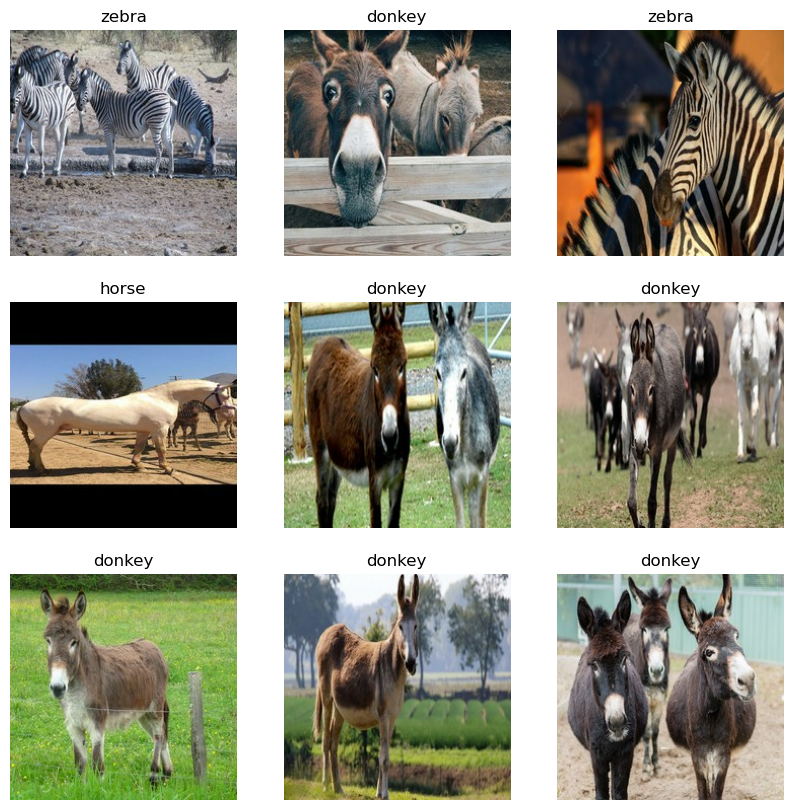

Epoch 1/10
40/40 [==============================] - 37s 800ms/step - loss: 0.9146 - accuracy: 0.5626
Epoch 2/10
40/40 [==============================] - 27s 676ms/step - loss: 0.6859 - accuracy: 0.6480
Epoch 3/10
40/40 [==============================] - 28s 689ms/step - loss: 0.5579 - accuracy: 0.7398
Epoch 4/10
40/40 [==============================] - 27s 678ms/step - loss: 0.4570 - accuracy: 0.8101
Epoch 5/10
40/40 [==============================] - 27s 678ms/step - loss: 0.3796 - accuracy: 0.8364
Epoch 6/10
40/40 [==============================] - 27s 662ms/step - loss: 0.2677 - accuracy: 0.8907
Epoch 7/10
40/40 [==============================] - 26s 651ms/step - loss: 0.1587 - accuracy: 0.9425
Epoch 8/10
40/40 [==============================] - 26s 644ms/step - loss: 0.1101 - accuracy: 0.9569
Epoch 9/10
40/40 [==============================] - 26s 655ms/step - loss: 0.0456 - accuracy: 0.9888
Epoch 10/10
40/40 [==============================] - 24s 603ms/step - loss: 0.1341 - accura

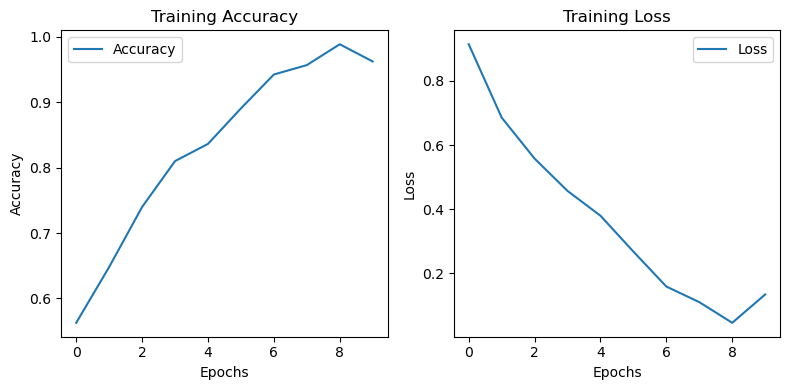

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Step 1: Set up dataset parameters
img_height = 224  # Height of input images
img_width = 224   # Width of input images
batch_size = 32   # Number of images per batch

# Path to the dataset directory (parent folder of 'donkey', 'horse', 'zebra')
dataset_path = "donkey-horse-zebra"

# Step 2: Load the dataset
train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True  # Shuffle the dataset
)

# Get class names (e.g., ['donkey', 'horse', 'zebra'])
class_names = train_dataset.class_names
print("Class names:", class_names)

# Step 3: Visualize some sample images
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):  # Take one batch of data
    for i in range(9):  # Show the first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

# Step 4: Prepare the dataset for training
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Step 5: Define the model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),  # Convolution layer
    layers.MaxPooling2D(),                         # Max pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Another convolution layer
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),                              # Flatten the data for dense layers
    layers.Dense(128, activation='relu'),          # Fully connected layer
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Step 6: Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='sparse_categorical_crossentropy',  # Suitable for multi-class classification
    metrics=['accuracy']
)

# Step 7: Train the model
epochs = 10  # Number of training epochs
history = model.fit(train_dataset, epochs=epochs)

# Step 8: Save the model
model.save("animal_classifier.h5")
print("Model saved as 'animal_classifier.h5'")

# Step 9: Plot training accuracy and loss
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Step 10: Make Predictions
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch with one image

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()

    print(f"Predicted class: {predicted_class} (Confidence: {confidence:.2f})")

# Example prediction
# predict_image("path_to_your_test_image.jpg")


In [6]:
# Example prediction
predict_image("test/donkey (225).jpg")

1/1 [==============================] - 1s 742ms/step
Predicted class: donkey (Confidence: 0.99)


In [7]:
# Example prediction
predict_image("test/horse (323).jpg")

1/1 [==============================] - 0s 31ms/step
Predicted class: horse (Confidence: 1.00)


In [8]:
# Example prediction
predict_image("test/zebra (103).jpg")

1/1 [==============================] - 0s 40ms/step
Predicted class: zebra (Confidence: 0.94)


Found 1253 files belonging to 3 classes.
Using 1003 files for training.
Found 1253 files belonging to 3 classes.
Using 250 files for validation.
Epoch 1/10
32/32 [==============================] - 26s 754ms/step - loss: 1.2802 - accuracy: 0.4686 - val_loss: 0.8528 - val_accuracy: 0.5480
Epoch 2/10
32/32 [==============================] - 23s 702ms/step - loss: 0.7294 - accuracy: 0.5912 - val_loss: 0.8194 - val_accuracy: 0.5360
Epoch 3/10
32/32 [==============================] - 22s 672ms/step - loss: 0.5950 - accuracy: 0.7059 - val_loss: 0.6843 - val_accuracy: 0.6560
Epoch 4/10
32/32 [==============================] - 22s 688ms/step - loss: 0.5285 - accuracy: 0.7577 - val_loss: 0.6122 - val_accuracy: 0.7160
Epoch 5/10
32/32 [==============================] - 23s 691ms/step - loss: 0.3755 - accuracy: 0.8435 - val_loss: 0.8730 - val_accuracy: 0.6840
Epoch 6/10
32/32 [==============================] - 21s 655ms/step - loss: 0.2975 - accuracy: 0.8714 - val_loss: 0.8237 - val_accuracy: 0.70

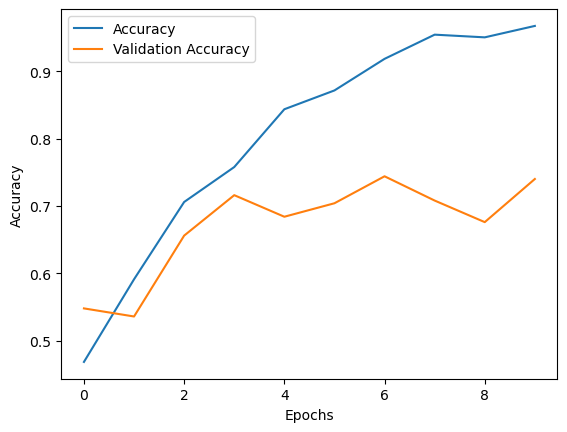

Model saved as animal_classifier.h5


AttributeError: 'MapDataset' object has no attribute 'class_names'

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

# 1. Load the dataset
dataset_dir = "donkey-horse-zebra"  # Replace with your project folder path

# Load images and split into training and validation sets
batch_size = 32
img_height = 224
img_width = 224

train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory="path_to_train_data",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Save class names
class_names = train_dataset.class_names

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# 2. Normalize the data
normalization_layer = layers.Rescaling(1./255)

train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
validation_dataset = validation_dataset.map(lambda x, y: (normalization_layer(x), y))

# 3. Build the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # 3 classes: donkey, horse, zebra
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Train the model
epochs = 10
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs
)

# 6. Evaluate the model
loss, accuracy = model.evaluate(validation_dataset)
print(f"Validation Accuracy: {accuracy:.2f}")

# 7. Plot training history
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 8. Save the model
model.save("animal_classifier.h5")
print("Model saved as animal_classifier.h5")

# 9. Make Predictions
class_names = train_dataset.class_names

def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = tf.reduce_max(predictions[0]).numpy()

    print(f"Predicted Class: {predicted_class} with Confidence: {confidence:.2f}")



In [3]:
# Example prediction
predict_image("test/donkey (225).jpg")


NameError: name 'predict_image' is not defined

In [ ]:
predict_image("test/horse (323).jpg")

In [ ]:
predict_image("test/zebra (103).jpg")